# Attention
**"프리트레인드 모델" (Pretrained model)**은 이미 대규모 데이터셋을 사용하여 사전 학습된 모델을 의미. 즉, 이 모델은 특정 작업을 수행하기 전에 일반적인 언어나 데이터를 학습한 상태

In [44]:
import tensorflow as tf
import numpy as np

### 데이터 준비

In [2]:
# 단어 시퀀스 데이터 준비
words = ['나는', '학교에', '가고', '있다']
word_to_idx = {word: idx for idx, word in enumerate(words)}
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

print(word_to_idx)
print(idx_to_word)

{'나는': 0, '학교에': 1, '가고': 2, '있다': 3}
{0: '나는', 1: '학교에', 2: '가고', 3: '있다'}


### 데이터 임베딩

In [ ]:
아산병원
진료차트(자연어) -> 임베딩 -> 진료차트를 보고 이 사람이 1년이 내에 사망?생존?

이 / 환자/ 는 / 노란 / 콧물
헤모글로빈 / 수치 / 낮음
* 토크나이징 -> 토큰화 -> 단어 개수 몇개인가? -> vocab_size  . 단어를 쪼개줌

공백(어느정도의 스페이스)
여러개의 공백 -> 하나의 공백으로 교체/개행 (엔터, 스페이스 등 공백 )

구글이 만든 모델을 가져온다 -> 사전에 학습된 모델을 가져온다 -> 프리트레인드 모델(CNN과 연결)
프리트레인드 모델 <- 나의 데이터를 추가적으로 쬬-끔 학습시켜줍니다 <- 나의 목적에 맞게 튜닝


In [3]:
# 임베딩 차원 설정
# embedding_dim: 각 단어를 표현하는 벡터의 차원 수 (여기서는 5차원으로 설정, 3차원은 x,y,z축이며, 5차원은 그래프로 표현자체는 어려움, 차원을 높인다고 좋은건 아님, 차원의 저주 등이 존재하며)
embedding_dim = 5

# vocab_size: 어휘 사전의 크기 (총 단어의 개수)
# words 리스트의 길이를 계산하여 설정 (여기서는 4개: '나는', '학교에', '가고', '있다')
vocab_size = len(words) # 4

# 임베딩 레이어 생성
# tf.keras.layers.Embedding: 정수 인덱스를 고정된 크기의 밀집 벡터로 변환하는 레이어
# 여기서는 4개의 단어('나는', '학교에', '가고', '있다')를 각각 5차원의 벡터로 변환하는 임베딩 레이어를 사용
# 즉, 4x5 크기의 임베딩 행렬이 생성됨
# 입력: vocab_size (어휘 크기)
# 출력: embedding_dim (임베딩 차원)
# 결과적으로 vocab_size x embedding_dim 크기의 임베딩 행렬이 생성됨
embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim) # 4, 5
embedding

### 입력 시퀀스 생성

In [4]:
# 입력 시퀀스 생성 (배치 크기 = 2) # 배치 에포크 이터레이션 (데이터가 크면 나눠서 진행해준다)
# 두 개의 문장을 생성:
# 1) "나는 학교에 가고 있다"
# 2) "학교에 가고 있다 나는"
# word_to_idx를 사용하여 각 단어를 정수 인덱스로 변환
input_sequence = [
    [word_to_idx['나는'], word_to_idx['학교에'], word_to_idx['가고'], word_to_idx['있다']],
    [word_to_idx['학교에'], word_to_idx['가고'], word_to_idx['있다'], word_to_idx['나는']]
    ]
# 생성된 정수 시퀀스 출력
print(input_sequence)
print()



# input_sequence를 텐서플로우 상수 텐서로 변환
# 이는 나중에 임베딩 레이어의 입력으로 사용됨
input_sequence_ = tf.constant(input_sequence)
# 텐서로 변환된 시퀀스 출력
print(input_sequence_)

[[0, 1, 2, 3], [1, 2, 3, 0]]

tf.Tensor(
[[0 1 2 3]
 [1 2 3 0]], shape=(2, 4), dtype=int32)


2025-02-01 22:45:08.999598: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 입력 시퀀스를 임베딩

In [17]:
# 임베딩 적용
embedded_sequence = embedding(input_sequence_)  # shape: (2, 4, 5)
embedded_sequence

<tf.Tensor: shape=(2, 4, 5), dtype=float32, numpy=
array([[[-0.0294992 ,  0.00560477, -0.02485607, -0.01098778,
         -0.0134889 ],
        [ 0.00803609, -0.04116616, -0.04100607, -0.03225907,
         -0.02941861],
        [-0.01771401, -0.00604271, -0.01815657,  0.02957096,
          0.02016914],
        [-0.01247771,  0.01471099,  0.02071761,  0.01716476,
         -0.02348535]],

       [[ 0.00803609, -0.04116616, -0.04100607, -0.03225907,
         -0.02941861],
        [-0.01771401, -0.00604271, -0.01815657,  0.02957096,
          0.02016914],
        [-0.01247771,  0.01471099,  0.02071761,  0.01716476,
         -0.02348535],
        [-0.0294992 ,  0.00560477, -0.02485607, -0.01098778,
         -0.0134889 ]]], dtype=float32)>

### 쿼리 벡터 생성

In [29]:
# 쿼리 벡터 생성 (예시로 첫 번째 단어의 임베딩을 쿼리로 사용)
# 첫번째 문장: '나는'의 임베딩 벡터 [0.01159065, 0.02614441, 0.01953292, 0.0170218, 0.02222321]
# 두번째 문장: '학교에'의 임베딩 벡터 [0.04224105, -0.01704571, 0.03613384, 0.00597052, 0.02944158]
query = embedded_sequence[:, 0, :]  # shape: (2, 5)
query

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-0.0294992 ,  0.00560477, -0.02485607, -0.01098778, -0.0134889 ],
       [ 0.00803609, -0.04116616, -0.04100607, -0.03225907, -0.02941861]],
      dtype=float32)>

### Attention 레이어 생성

- 사용자 정의 레이어 생성
- 구조 참고: https://www.tensorflow.org/tutorials/customization/custom_layers#implementing_custom_layers


In [38]:
# Attention 학습 방법
# 1. Query, Key, Value 벡터 준비
#    - Query: 현재 디코더의 은닉 상태 (찾고자 하는 정보)
#    - Key: 인코더의 은닉 상태들 (참조할 정보)
#    - Value: 실제 입력 시퀀스의 정보

# 2. Attention Score 계산
#    - Query와 Key 사이의 유사도를 내적으로 계산
#    - 내적값이 클수록 두 벡터가 유사하며 해당 위치의 정보가 중요

# 3. Attention Weight 계산
#    - Score에 Softmax 적용하여 확률 분포로 변환
#    - 모든 가중치의 합이 1이 되도록 정규화

# 4. Context Vector 생성
#    - Attention Weight와 Value를 가중합하여 최종 Context Vector 생성
#    - 중요한 정보가 강조된 표현을 얻음

# SimpleAttention 클래스는 tf.keras.layers.Layer를 상속받아 커스텀 레이어를 구현합니다.
# tf.keras.layers.Layer는 모든 Keras 레이어의 기본 클래스입니다.
# super().__init__()을 호출하여 부모 클래스의 초기화 메서드를 실행합니다.
class SimpleAttention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(SimpleAttention, self).__init__()

        # units 인자는 Attention 메커니즘에서 사용할 은닉층의 크기를 지정합니다.
        # 이 값은 Query와 Key를 동일한 차원으로 변환할 때 사용됩니다.

        # 1단계: Query와 Key를 동일한 차원(units)으로 변환하기 위한 가중치 행렬 정의
        # Dense 레이어의 출력 차원이 units가 됩니다.
        self.W1 = tf.keras.layers.Dense(units)

        # Attention score를 1차원으로 변환하기 위한 가중치 행렬
        # Attention score를 1차원으로 변환하는 이유:
        # 1. 각 시점(단어)마다 하나의 중요도 점수가 필요함
        # 2. softmax 함수에 입력으로 사용하기 위해 스칼라 값 필요
        # 3. attention weight를 계산할 때 각 단어별로 하나의 가중치가 필요하기 때문
        # 최종적으로 각 시점에 대한 하나의 점수를 얻기 위해 1차원으로 압축
        self.W2 = tf.keras.layers.Dense(1)

    # call 메서드는 레이어가 호출될 때 실행되는 메서드입니다.
    # tf.keras.layers.Layer를 상속받은 클래스에서 반드시 구현해야 하는 메서드이며,
    # 실제 레이어의 연산을 정의하는 부분입니다.
    # 입력:
    # - query: 현재 디코더의 은닉 상태 (찾고자 하는 정보)
    # - values: 인코더의 은닉 상태들 (참조할 정보이자 실제 입력 시퀀스의 정보)
    def call(self, query, values):
        # 1단계: Query 벡터 준비 - 시간 축 추가로 차원 확장
        query_with_time_axis = tf.expand_dims(query, 1)
        
#         return query_with_time_axis
        # 2단계: Attention Score 계산
        # - Query와 Key(values)를 units 차원으로 변환 후 유사도를 내적을 활용하여 계산
        # - 내적 후 tanh 활성화 함수로 비선형성 추가
        score = self.W2(tf.nn.tanh(self.W1(query_with_time_axis) * self.W1(values)))

        # # 3단계: Attention Weight 계산
        # # - softmax로 정규화하여 모든 가중치 합이 1이 되도록 함
        attention_weights = tf.nn.softmax(score, axis=1)

        # # 4단계: Context Vector 계산
        # # - attention weight와 value를 곱하여 중요 정보 강조
        context_vector = attention_weights * values
        # # - 가중합을 통해 최종 context vector 생성
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

# embedding_dim을 units로 사용하여 Query와 Key의 차원을 맞춤
# Query와 Key의 차원을 맞춰주는 이유:
# 1. Attention Score 계산 시 내적 연산을 수행하기 위해서는 두 벡터의 차원이 동일해야 함
# 2. SimpleAttention 클래스의 call() 메서드에서 self.W1을 통해 Query와 Key를 동일한 차원(units)으로 변환
# 3. 이후 변환된 벡터들의 내적으로 유사도를 계산하여 Attention Score를 얻음
# 따라서 embedding_dim을 units 파라미터로 사용하여 Query와 Key의 차원을 동일하게 맞춰줌
attention_layer = SimpleAttention(embedding_dim) # 5
context_vector, attention_weights = attention_layer(query, embedded_sequence)

In [35]:
print("\n입력 문장:")
for i in range(2):
    print(f"문장 {i+1}:", " ".join([idx_to_word[idx.numpy()] for idx in input_sequence_[i]]))


입력 문장:
문장 1: 나는 학교에 가고 있다
문장 2: 학교에 가고 있다 나는


In [36]:
attention_weights

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[ 0.00803609, -0.04116616, -0.04100607, -0.03225907, -0.02941861]],
      dtype=float32)>

In [39]:
print("\nAttention 가중치:")
for i in range(2):
    print(f"\n문장 {i+1}의 각 단어에 대한 attention 가중치:")
    for j, word in enumerate(words):
        weight = attention_weights[i][j].numpy()[0]
        print(f"{idx_to_word[j]}: {weight:.3f}")


Attention 가중치:

문장 1의 각 단어에 대한 attention 가중치:
나는: 0.250
학교에: 0.250
가고: 0.250
있다: 0.250

문장 2의 각 단어에 대한 attention 가중치:
나는: 0.250
학교에: 0.250
가고: 0.250
있다: 0.250


---

### tf.keras.layers.Attention을 사용한 더 간단한 구현

In [40]:
# 자연어 처리를 위한 예시 문장 준비
words = ['cat', 'saw', 'fish', 'in', 'the', 'pond', 'and', 'decided', 'to', 'catch']
word_to_idx = {word: idx for idx, word in enumerate(words)}
idx_to_word = {idx: word for idx, word in enumerate(words)}

# 두 개의 영어 문장 생성
input_sequence = tf.constant([
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],  # "cat saw fish in the pond and decided to catch" 10개의 단어
    [2, 3, 4, 5, 6, 7, 8, 9, 9, 9]   # "fish in the pond and decided to catch" 8개 단어
])


In [41]:

# 단어 임베딩 차원 설정
embedding_dim = 10

# 문장에 단어 임베딩 레이어 생성 및 적용
embedding_layer = tf.keras.layers.Embedding(len(words), embedding_dim)
embedded_sequence = embedding_layer(input_sequence)

# 문장 분석을 위한 Query 벡터 생성
query = tf.random.normal([2, embedding_dim])  # batch size 2, embedding dimension 5
query

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.8390877 ,  1.919225  ,  0.00363624, -0.66230583, -2.4693048 ,
        -0.27012685, -1.1110951 ,  1.4539831 ,  0.09375298,  0.59442014],
       [ 1.0056814 ,  0.26804754,  2.5898736 , -1.1057687 , -0.6461786 ,
        -0.8894963 ,  1.7569269 ,  0.05415321,  0.35458943, -0.8559529 ]],
      dtype=float32)>

In [42]:
# tf.keras.layers.Attention을 사용한 더 간단한 구현
attention = tf.keras.layers.Attention()

# query와 value의 shape을 맞추기 위해 query 차원 확장
query_with_time_axis = tf.expand_dims(query, 1)

# Attention 계산
attention_output = attention([query_with_time_axis, embedded_sequence])

print("\n기본 Attention 레이어 출력:")
print(attention_output.shape)
print(attention_output)

# 참고: tf.keras.layers.Attention은 내부적으로
# Query, Key, Value에 대한 변환과 스케일링,
# softmax를 통한 가중치 계산 등을 자동으로 처리합니다.



기본 Attention 레이어 출력:
(2, 1, 10)
tf.Tensor(
[[[-0.00624432  0.01839223 -0.0094374   0.00470512 -0.01510459
    0.00155678  0.01165645  0.01281288 -0.01358805  0.00321485]]

 [[ 0.00935854  0.01467576 -0.01652054 -0.00255084 -0.01317625
    0.0145024   0.01836742  0.01648091 -0.00559907  0.00177507]]], shape=(2, 1, 10), dtype=float32)


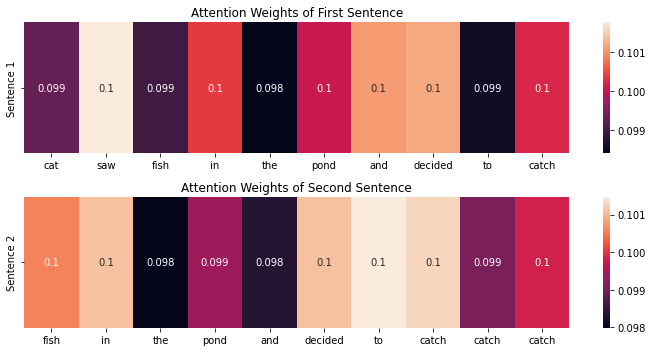

In [43]:
# 시각화를 위한 라이브러리 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# Attention 가중치 계산
attention_weights = tf.nn.softmax(attention_output, axis=-1)

# 히트맵 그리기
plt.figure(figsize=(10, 5))

# 첫 번째 문장의 Attention 시각화
plt.subplot(2, 1, 1)
sns.heatmap(attention_weights[0],
            xticklabels=['cat', 'saw', 'fish', 'in', 'the', 'pond', 'and', 'decided', 'to', 'catch'],
            yticklabels=['Sentence 1'],
            annot=True)
plt.title('Attention Weights of First Sentence')

# 두 번째 문장의 Attention 시각화
plt.subplot(2, 1, 2)
sns.heatmap(attention_weights[1],
            xticklabels=['fish', 'in', 'the', 'pond', 'and', 'decided', 'to', 'catch', 'catch', 'catch'],
            yticklabels=['Sentence 2'],
            annot=True)
plt.title('Attention Weights of Second Sentence')

plt.tight_layout()
plt.show()


히트맵 시각화 결과 분석

1. 두 문장의 Attention 가중치가 비슷한 패턴을 보이는 이유:
   - 현재 구현된 기본 Attention 모델은 단순히 단어 임베딩 간의 유사도만을 계산
   - 문맥적 정보나 위치 정보를 고려하지 않음
   - 실제 자연어의 문맥적 의미를 충분히 반영하지 못함
2. 개선 방안:
   - Positional Encoding을 추가하여 단어의 위치 정보 반영
   - Self-Attention 메커니즘 도입
   - Multi-head Attention 사용으로 다양한 관점에서의 관계 파악


In [46]:
#위치에 대한 정보를 제대로 파악하지 못하고 있음, 순서의 의미 Positional Encoding 반영해서 정확히 해줘야함

#개선 방안:
#Positional Encoding을 추가하여 단어의 위치 정보 반영
#Self-Attention 메커니즘 도입
#Multi-head Attention 사용으로 다양한 관점에서의 관계 파악

SyntaxError: invalid syntax (3319954619.py, line 8)

In [ ]:
# 어떤 프리트레인드 모델을 사용할 계획

#Transformer 기반(BERT, GPT, T5, etc.)
#Vision 모델(ViT, CLIP, etc.)
#Seq2Seq 모델(T5, BART, etc.)
#다른 도메인 특화 모델(예: BioBERT, CodeBERT 등)

#텍스트 분류
#기계 번역
#요약
#질의응답(QA)
#시계열 예측

In [13]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

model_name = "t5-base" # 또는 "t5-large","t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name, force_download=True)
model = T5ForConditionalGeneration.from_pretrained(model_name, force_download=True)

# 모델 선택
# model_name = "t5-large"  
# tokenizer = T5Tokenizer.from_pretrained(model_name)
# model = T5ForConditionalGeneration.from_pretrained(model_name)

# 긴 입력 문장
text = """
자연어 처리는 인공지능의 한 분야로, 컴퓨터가 인간의 언어를 이해하고 생성할 수 있도록 돕는다. 
최근에는 딥러닝 기반의 모델들이 등장하며 자연어 처리 성능이 크게 향상되었다. 
특히, 트랜스포머 기반의 모델들은 번역, 요약, 질의응답 등의 다양한 작업에서 뛰어난 성능을 보이고 있다. 
예를 들어, BERT와 GPT 같은 모델들은 특정한 자연어 처리 작업에서 기존 모델보다 훨씬 더 뛰어난 성능을 보인다. 
"""

# 입력 변환
input_text = "summarize: " + text
inputs = tokenizer(input_text, return_tensors="pt", max_length=1000, truncation=True, padding="longest")

# 요약 생성
summary_ids = model.generate(**inputs, max_length=1000, min_length=30, num_beams=5, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)

print("요약 결과:", summary)


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [11]:
print(f"모델: {model_name}")
print(f"토크나이저 vocab 크기: {tokenizer.vocab_size}")


모델: t5-large
토크나이저 vocab 크기: 32000


In [6]:
print("Tokenized Input:", tokenizer.encode(input_text, truncation=True, max_length=512))

Tokenized Input: [21603, 10, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 2, 6, 3, 2, 3, 2, 3, 2, 3, 2, 6, 3, 2, 6, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 3, 2, 3, 2, 6, 272, 24203, 2, 350, 6383, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 1]


In [7]:
print("생성된 요약 토큰:", summary_ids)
print("디코딩된 요약:", tokenizer.decode(summary_ids[0]))


생성된 요약 토큰: tensor([[0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
         2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 5, 1]])
디코딩된 요약: <pad> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk> <unk>.</s>


In [12]:
test_text = "summarize: The quick brown fox jumps over the lazy dog."
inputs = tokenizer(test_text, return_tensors="pt", max_length=512, truncation=True)
summary_ids = model.generate(**inputs, max_length=50, num_beams=5, early_stopping=True)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("테스트 요약 결과:", summary)

테스트 요약 결과: quick brown fox jumps over lazy dog.


In [19]:
#pip install sentencepiece

In [24]:
import re
from transformers import T5Tokenizer, T5ForConditionalGeneration

# ✅ 한글 지원 모델 사용
model_name = "google/mt5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# ✅ 긴 문장 테스트
text = """20여 년 동안 문단생활을 해온 장문 작가는 노동자 작가다. 오늘도 그는 인천 송도에 있는 세계문자박물관 건설 현장에서 비지땀을 흘리며 마음의 문자를 발굴해내고 있다. 매일 같이 자재를 들어 나르고 지시하며, 눈 깜짝하는 사이에 사고가 도사리고 있어 늘 긴장해야 하는 건설 현장에서 일하면서 언제 이 많은 분량의 글을 쓰며, 어떻게 이렇게 기발한 상상력으로 이런 소설을 써낼 수 있었는지가 놀랍다.

장문 작가는 이미 시조시인으로 널리 알려진 분이다. 20여 년 동안 그는 여러 문학단체에서 활발히 문단 활동을 해오며 한국스토리문인협회가 주관한 스토리문학상(시조부문)을 수상하기도 했다. 그런 시조시인이 이렇게 소설을 잘 써 내리라고는 상상치 못했다. 장문 작가의 상상력은 가히 기발함을 넘어 뛰어나다고 말할 수 있다.

장문 작가는 자서를 통해 “글을 쓰는 사람은 자신의 글을 끝까지 읽어주고 공감해준다면 그것은 행복이고 은혜다. 명예를 목적으로 할 필요도 없고, 더불어 행복하기에 글을 쓰는 이유다. 남들 다 은퇴한 나이에도 일하면서 소설을 쓴다는 것이 무모한 도전일 수 있지만, 그동안 필자의 시와 시조를 사랑해준 한 분 한 분의 은혜에 대해 1만분의 일이라도 갚을 길을 찾고, 언제 끝날지 모르는 코로나19 속 힘드신 분들에게 위로와 응원의 마음을 담아 이번 단편소설집 ‘끈’을 출간하게 됐다”고 책을 펴내는 마음을 피력했다.
"""""

# ✅ 입력 데이터 변환 (prefix 추가)
input_text = "한글 요약: " + text
inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True, padding="longest")

# ✅ 요약 생성 (extra_id 방지 설정 추가)
summary_ids = model.generate(
    inputs.input_ids, 
    max_length=150, 
    min_length=30, 
    num_beams=5, 
    early_stopping=True, 
    no_repeat_ngram_size=3  # 반복되는 구절 방지
)

# ✅ 요약 결과 디코딩 후 불필요한 토큰 제거
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
summary = re.sub(r"<extra_id_\d+>", "", summary).strip()  # 특수 토큰 제거
summary = " ".join(summary.split())  # 띄어쓰기 정리

print("요약 결과:", summary)


You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.


요약 결과: 한 분 한분의 은혜에 대해 한글 요약: 20여 년 동안 문단생활을 해온 장문 작가


In [25]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Hugging Face에서 모델과 토크나이저 로드
model_name = "bert-base-uncased"  # 예시로 BERT 모델 사용
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 예시 텍스트 처리
inputs = tokenizer("Hello, this is an example sentence.", return_tensors="pt")
outputs = model(**inputs)

print(outputs)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

SequenceClassifierOutput(loss=None, logits=tensor([[0.0864, 0.4036]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
